# Final Project: Car Insurance Claim

Target for this dataset is to create two models:
a) To cluster the information according to characteristics
b) Non-supervised...

https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

## Import and cleaning

In [86]:
#pip install yellowbrick

In [87]:
# pip install -U imbalanced-learn

In [88]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

import statsmodels
import statsmodels.api as sm
from statsmodels.stats import diagnostic
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ztest

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import f_oneway, f

from yellowbrick.regressor import ResidualsPlot

from joblib import dump, load

import warnings
warnings.simplefilter('ignore')

In [89]:
data = pd.read_csv('Car_Insurance_Claim.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [90]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [91]:
data.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

In [92]:
data.rename(str.lower, axis='columns', inplace=True)

In [93]:
data.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

In [94]:
cols_not_considered = ['id']
data_clean = data.copy()
data_clean.drop(columns=cols_not_considered, inplace=True)
data_clean

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [95]:
for i in data_clean.columns:
    print(i, data_clean[str(i)].unique())

age ['65+' '16-25' '26-39' '40-64']
gender ['female' 'male']
race ['majority' 'minority']
driving_experience ['0-9y' '10-19y' '20-29y' '30y+']
education ['high school' 'none' 'university']
income ['upper class' 'poverty' 'working class' 'middle class']
credit_score [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
vehicle_ownership [1. 0.]
vehicle_year ['after 2015' 'before 2015']
married [0. 1.]
children [1. 0.]
postal_code [10238 32765 92101 21217]
annual_mileage [12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]
vehicle_type ['sedan' 'sports car']
speeding_violations [ 0  2  3  7  6  4 10 13  1  5  9  8 12 11 15 17 19 18 16 14 22]
duis [0 2 1 3 4 5 6]
past_accidents [ 0  1  3  7  2  5  4  6  8 10 11  9 12 14 15]
outcome [0. 1.]


In [96]:
remove_dot = ['vehicle_ownership', 'married', 'children', 'outcome']

In [97]:
for i in data_clean[remove_dot]:
    data_clean = data_clean.astype({str(i): int})

In [98]:
for i in data_clean.columns:
    print(i, data_clean[str(i)].unique())

age ['65+' '16-25' '26-39' '40-64']
gender ['female' 'male']
race ['majority' 'minority']
driving_experience ['0-9y' '10-19y' '20-29y' '30y+']
education ['high school' 'none' 'university']
income ['upper class' 'poverty' 'working class' 'middle class']
credit_score [0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
vehicle_ownership [1 0]
vehicle_year ['after 2015' 'before 2015']
married [0 1]
children [1 0]
postal_code [10238 32765 92101 21217]
annual_mileage [12000. 16000. 11000. 13000. 14000. 10000.  8000.    nan 18000. 17000.
  7000. 15000.  9000.  5000.  6000. 19000.  4000.  3000.  2000. 20000.
 21000. 22000.]
vehicle_type ['sedan' 'sports car']
speeding_violations [ 0  2  3  7  6  4 10 13  1  5  9  8 12 11 15 17 19 18 16 14 22]
duis [0 2 1 3 4 5 6]
past_accidents [ 0  1  3  7  2  5  4  6  8 10 11  9 12 14 15]
outcome [0 1]


In [99]:
data_clean.isnull().sum().to_frame(name='valores_faltantes').query('valores_faltantes > 0').sort_values(by='valores_faltantes',ascending=False)

,valores_faltantes
credit_score,982
annual_mileage,957


In [100]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  int32  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int32  
 10  children             10000 non-null  int32  
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [101]:
data_clean['annual_mileage'] = round(data_clean['annual_mileage'].interpolate(),-3)
data_clean.annual_mileage.value_counts()

12000.0    1456
11000.0    1372
10000.0    1260
13000.0    1218
14000.0    1039
9000.0      899
15000.0     657
8000.0      620
16000.0     452
7000.0      329
17000.0     255
6000.0      168
18000.0     105
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: annual_mileage, dtype: int64

In [102]:
data_clean['credit_score'] = data_clean.credit_score.interpolate()

In [103]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  int32  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int32  
 10  children             10000 non-null  int32  
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [104]:
data_clean.drop(columns='postal_code', inplace=True)

## Numeric data

In [105]:
cols_num = data_clean._get_numeric_data().columns.tolist()
cols_num

['credit_score',
 'vehicle_ownership',
 'married',
 'children',
 'annual_mileage',
 'speeding_violations',
 'duis',
 'past_accidents',
 'outcome']

In [106]:
data_num = data_clean[cols_num].copy()
data_num.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome
0,0.629027,1,0,1,12000.0,0,0,0,0
1,0.357757,0,0,0,16000.0,0,0,0,1
2,0.493146,1,0,0,11000.0,0,0,0,0
3,0.206013,1,0,1,11000.0,0,0,0,0
4,0.388366,1,0,0,12000.0,2,0,1,1


### Correlation

In [107]:
corr = data_num.corr()
corr

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome
credit_score,1.000000,0.290373,0.261814,0.205607,-0.150728,0.191406,0.114323,0.170141,-0.301867
vehicle_ownership,0.290373,1.000000,0.175626,0.125990,-0.091792,0.133868,0.086567,0.119521,-0.378921
married,0.261814,0.175626,1.000000,0.287009,-0.432498,0.218855,0.120840,0.215269,-0.262104
children,0.205607,0.125990,0.287009,1.000000,-0.415311,0.220415,0.115354,0.206295,-0.232835
annual_mileage,-0.150728,-0.091792,-0.432498,-0.415311,1.000000,-0.299467,-0.109927,-0.184361,0.173629
speeding_violations,0.191406,0.133868,0.218855,0.220415,-0.299467,1.000000,0.359838,0.443074,-0.291862
duis,0.114323,0.086567,0.120840,0.115354,-0.109927,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.170141,0.119521,0.215269,0.206295,-0.184361,0.443074,0.259359,1.000000,-0.311495
outcome,-0.301867,-0.378921,-0.262104,-0.232835,0.173629,-0.291862,-0.189352,-0.311495,1.000000


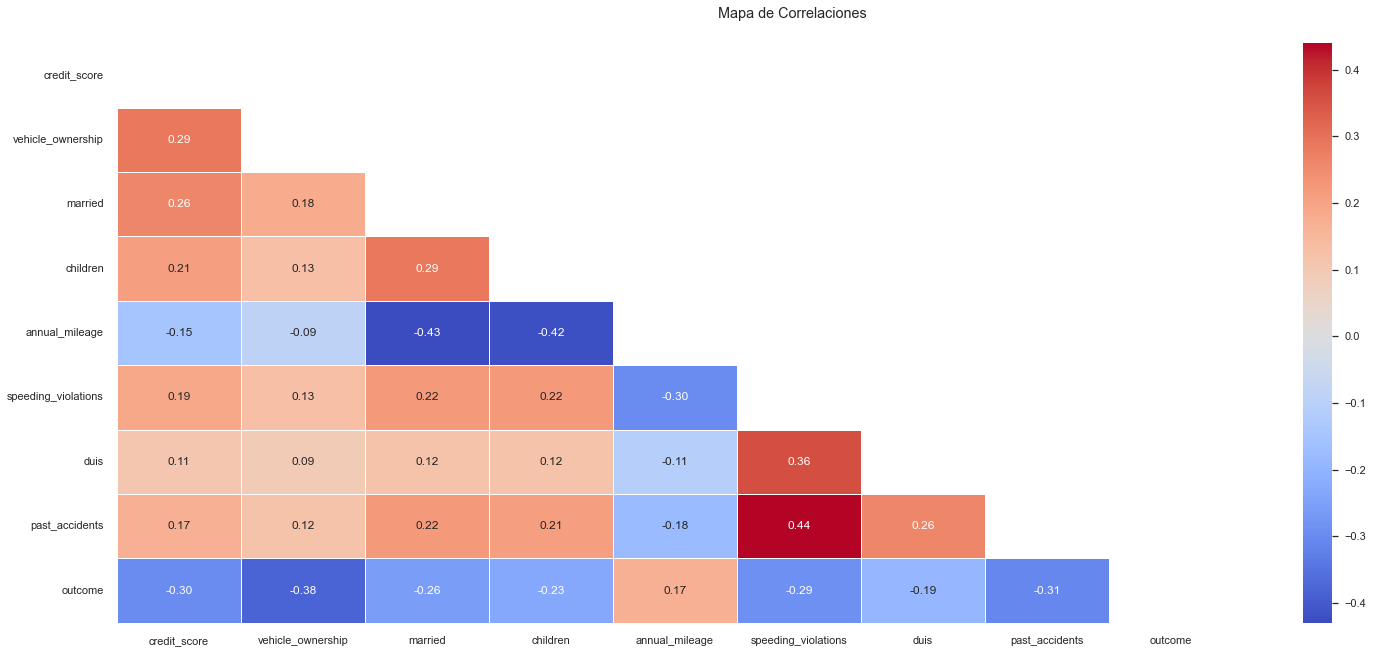

In [108]:
sns.set()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(25, 10))
    sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, mask=mask)
    fig.subplots_adjust(top=0.93)
    fig.suptitle('Mapa de Correlaciones');

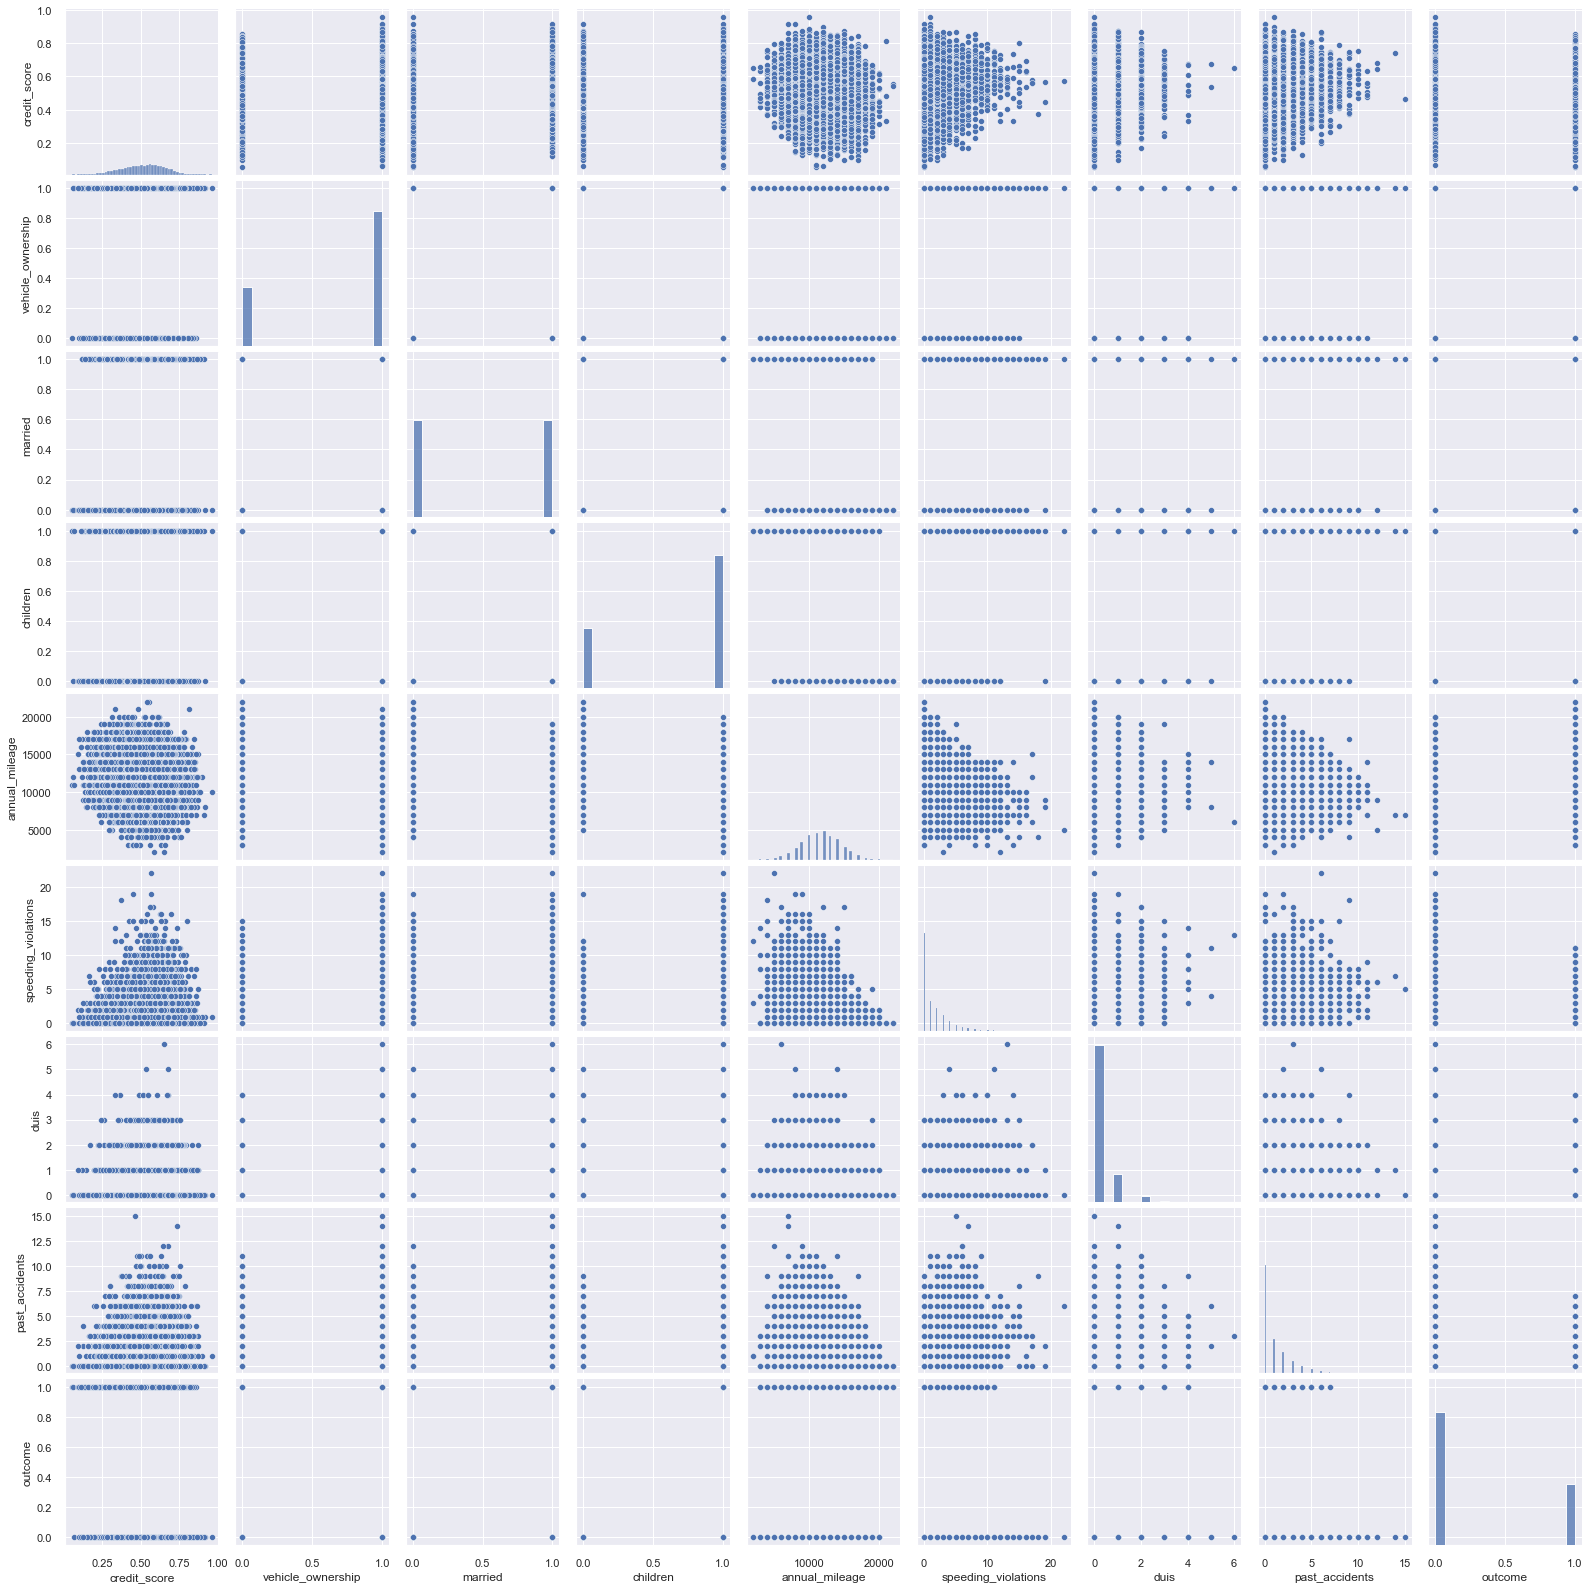

In [109]:
sns.pairplot(data_clean);

### Distribution

(0.031048143640524106, 0.0009999999999998899)


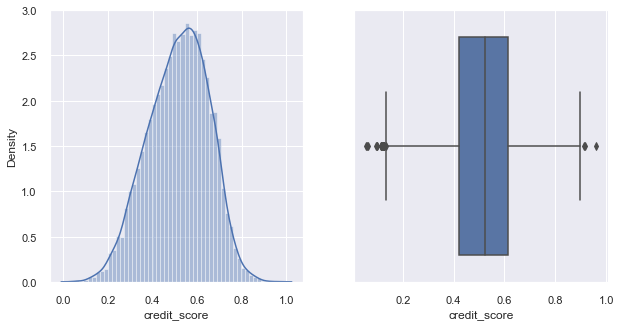


(0.44214849392318684, 0.0009999999999998899)


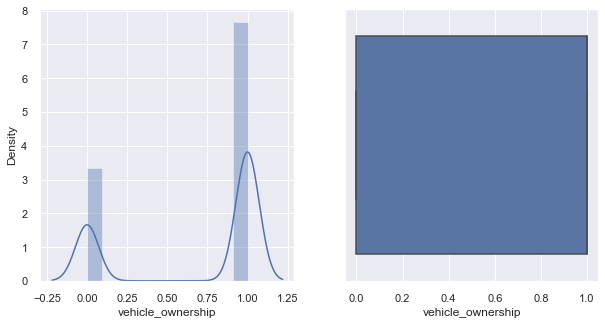


(0.3422615524709315, 0.0009999999999998899)


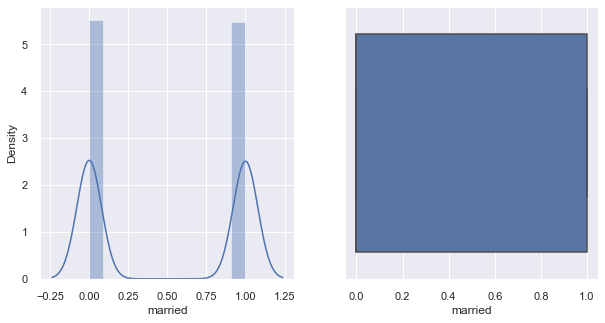


(0.438048657873314, 0.0009999999999998899)


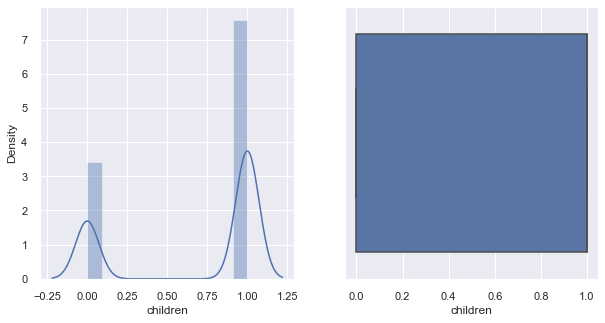


(0.07695589746512965, 0.0009999999999998899)


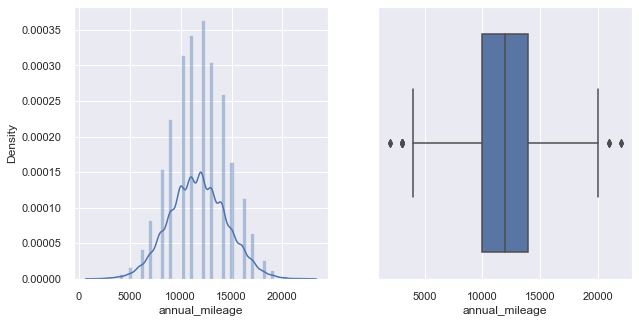


(0.25416877897086737, 0.0009999999999998899)


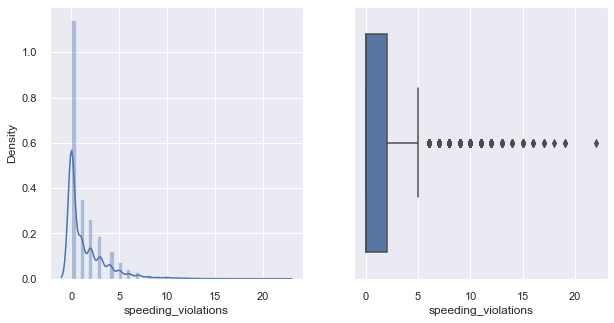


(0.4785652962906939, 0.0009999999999998899)


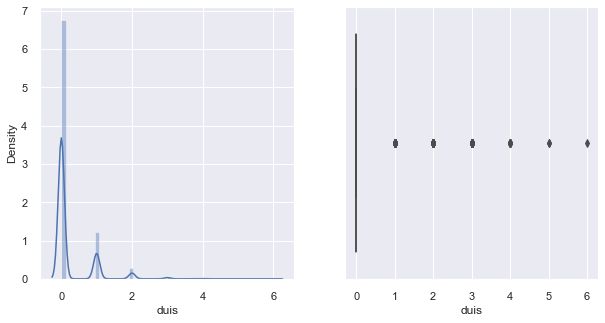


(0.29706373321246715, 0.0009999999999998899)


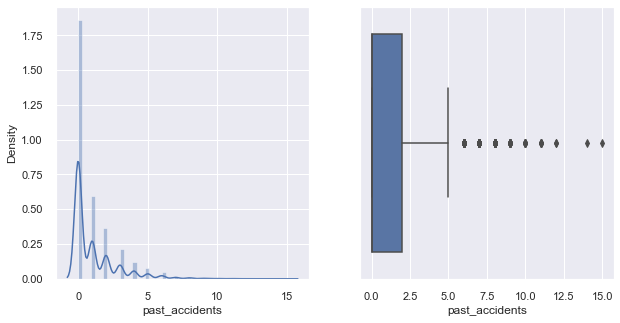


(0.43699603320908953, 0.0009999999999998899)


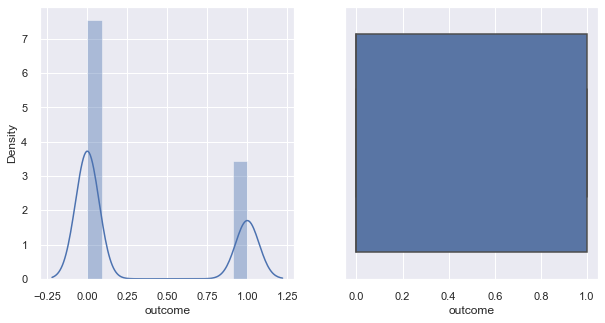

In [110]:
for columna in data_num.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(data_num[columna], kde=True, ax=ax[0])
    sns.boxplot(data_num[columna], orient='h', ax=ax[1])
    print(diagnostic.kstest_normal(data_num[columna]))
    plt.show()
    print('');

<Figure size 576x396 with 0 Axes>

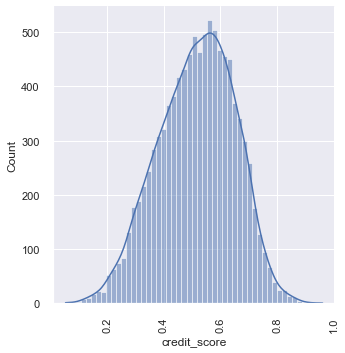

In [111]:
plt.figure()
sns.displot(data_num.credit_score, kde=True)
plt.xticks(rotation=90);

<Figure size 576x396 with 0 Axes>

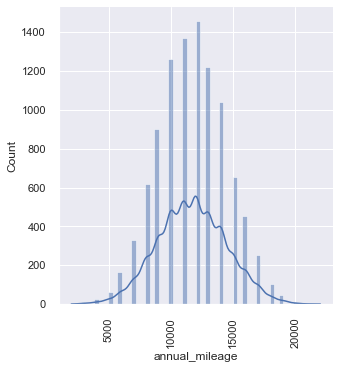

In [112]:
plt.figure()
sns.displot(data_num.annual_mileage, kde=True)
plt.xticks(rotation=90);

## Categorical data

In [113]:
cols_categ = data_clean.drop(columns=cols_num).columns.tolist()
cols_categ

['age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'vehicle_year',
 'vehicle_type']

In [114]:
data_categ = data_clean[cols_categ].copy()
data_categ

,age,gender,race,driving_experience,education,income,vehicle_year,vehicle_type
0,65+,female,majority,0-9y,high school,upper class,after 2015,sedan
1,16-25,male,majority,0-9y,none,poverty,before 2015,sedan
2,16-25,female,majority,0-9y,high school,working class,before 2015,sedan
3,16-25,male,majority,0-9y,university,working class,before 2015,sedan
4,26-39,male,majority,10-19y,none,working class,before 2015,sedan
...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,before 2015,sedan
9996,26-39,female,majority,10-19y,none,middle class,after 2015,sedan
9997,26-39,male,majority,0-9y,high school,middle class,before 2015,sedan
9998,26-39,female,majority,10-19y,high school,poverty,before 2015,sedan


Nombre de Columna:  age
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


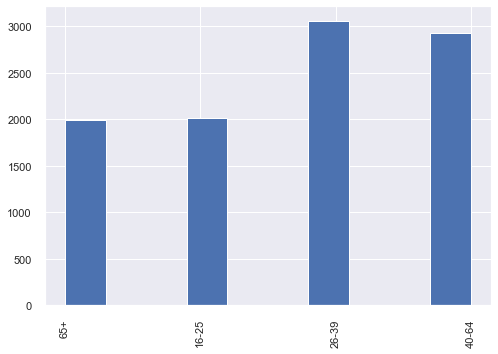

****************************************************************************************************
Nombre de Columna:  gender
female    5010
male      4990
Name: gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


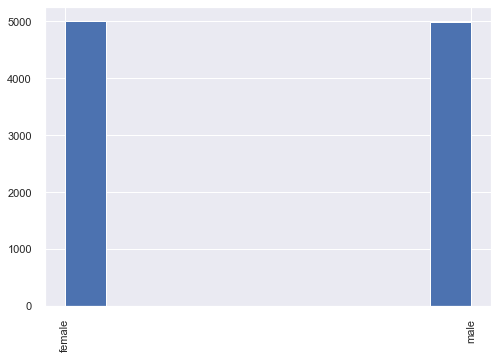

****************************************************************************************************
Nombre de Columna:  race
majority    9012
minority     988
Name: race, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


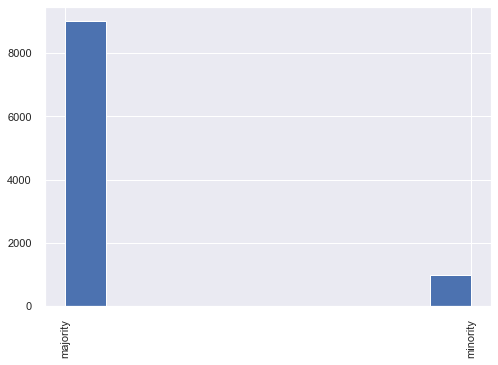

****************************************************************************************************
Nombre de Columna:  driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


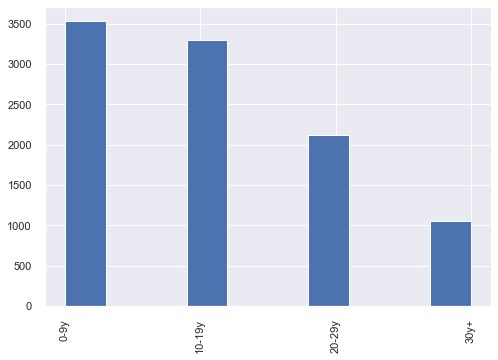

****************************************************************************************************
Nombre de Columna:  education
high school    4157
university     3928
none           1915
Name: education, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


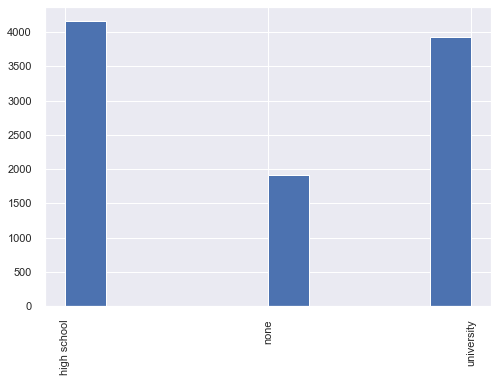

****************************************************************************************************
Nombre de Columna:  income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


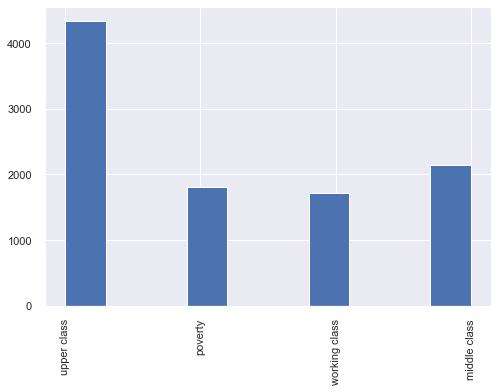

****************************************************************************************************
Nombre de Columna:  vehicle_year
before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


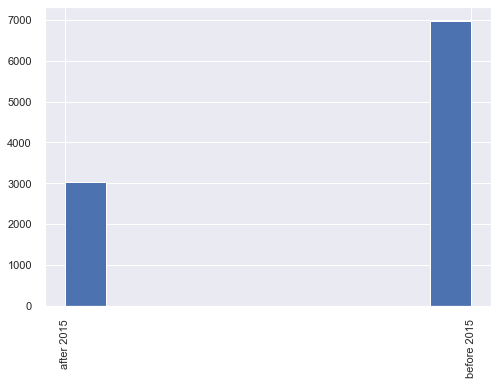

****************************************************************************************************
Nombre de Columna:  vehicle_type
sedan         9523
sports car     477
Name: vehicle_type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


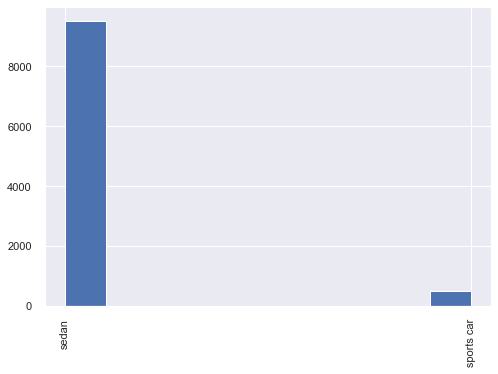

****************************************************************************************************


In [115]:
for columna in data_categ.columns:
    print(f'Nombre de Columna: ', columna)
    print(data_categ[columna].value_counts())
    print(data_categ[columna].hist(xrot=90))
    plt.show()
    print('**********'*10)

### Transformation

In [116]:
data_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 10000 non-null  object
 1   gender              10000 non-null  object
 2   race                10000 non-null  object
 3   driving_experience  10000 non-null  object
 4   education           10000 non-null  object
 5   income              10000 non-null  object
 6   vehicle_year        10000 non-null  object
 7   vehicle_type        10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


In [117]:
pd.get_dummies(data_categ, columns=['gender'], drop_first=True)

,age,race,driving_experience,education,income,vehicle_year,vehicle_type,gender_male
0,65+,majority,0-9y,high school,upper class,after 2015,sedan,0
1,16-25,majority,0-9y,none,poverty,before 2015,sedan,1
2,16-25,majority,0-9y,high school,working class,before 2015,sedan,0
3,16-25,majority,0-9y,university,working class,before 2015,sedan,1
4,26-39,majority,10-19y,none,working class,before 2015,sedan,1
...,...,...,...,...,...,...,...,...
9995,26-39,majority,10-19y,university,upper class,before 2015,sedan,0
9996,26-39,majority,10-19y,none,middle class,after 2015,sedan,0
9997,26-39,majority,0-9y,high school,middle class,before 2015,sedan,1
9998,26-39,majority,10-19y,high school,poverty,before 2015,sedan,0


In [118]:
data_categ_clean = pd.get_dummies(data_categ, columns=['gender', 'race', 'vehicle_year', 'vehicle_type'], drop_first=True)
data_categ_clean

,age,driving_experience,education,income,gender_male,race_minority,vehicle_year_before 2015,vehicle_type_sports car
0,65+,0-9y,high school,upper class,0,0,0,0
1,16-25,0-9y,none,poverty,1,0,1,0
2,16-25,0-9y,high school,working class,0,0,1,0
3,16-25,0-9y,university,working class,1,0,1,0
4,26-39,10-19y,none,working class,1,0,1,0
...,...,...,...,...,...,...,...,...
9995,26-39,10-19y,university,upper class,0,0,1,0
9996,26-39,10-19y,none,middle class,0,0,0,0
9997,26-39,0-9y,high school,middle class,1,0,1,0
9998,26-39,10-19y,high school,poverty,0,0,1,0


In [119]:
data_categ_clean = pd.get_dummies(data_categ_clean, columns=['age', 'driving_experience', 'education', 'income'], drop_first=False)
data_categ_clean

,gender_male,race_minority,vehicle_year_before 2015,vehicle_type_sports car,age_16-25,age_26-39,age_40-64,age_65+,driving_experience_0-9y,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_high school,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class
0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
9996,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
9997,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
9998,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [120]:
data_categ_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   gender_male                10000 non-null  uint8
 1   race_minority              10000 non-null  uint8
 2   vehicle_year_before 2015   10000 non-null  uint8
 3   vehicle_type_sports car    10000 non-null  uint8
 4   age_16-25                  10000 non-null  uint8
 5   age_26-39                  10000 non-null  uint8
 6   age_40-64                  10000 non-null  uint8
 7   age_65+                    10000 non-null  uint8
 8   driving_experience_0-9y    10000 non-null  uint8
 9   driving_experience_10-19y  10000 non-null  uint8
 10  driving_experience_20-29y  10000 non-null  uint8
 11  driving_experience_30y+    10000 non-null  uint8
 12  education_high school      10000 non-null  uint8
 13  education_none             10000 non-null  uint8
 14  education_university   

In [121]:
df_clean = pd.concat([data_num, data_categ_clean], axis=1)

In [122]:
df_clean.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome,gender_male,...,driving_experience_10-19y,driving_experience_20-29y,driving_experience_30y+,education_high school,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class
0,0.629027,1,0,1,12000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.357757,0,0,0,16000.0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,0.493146,1,0,0,11000.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.206013,1,0,1,11000.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.388366,1,0,0,12000.0,2,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1


In [123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score               10000 non-null  float64
 1   vehicle_ownership          10000 non-null  int32  
 2   married                    10000 non-null  int32  
 3   children                   10000 non-null  int32  
 4   annual_mileage             10000 non-null  float64
 5   speeding_violations        10000 non-null  int64  
 6   duis                       10000 non-null  int64  
 7   past_accidents             10000 non-null  int64  
 8   outcome                    10000 non-null  int32  
 9   gender_male                10000 non-null  uint8  
 10  race_minority              10000 non-null  uint8  
 11  vehicle_year_before 2015   10000 non-null  uint8  
 12  vehicle_type_sports car    10000 non-null  uint8  
 13  age_16-25                  10000 non-null  uint

In [124]:
data_clean.to_csv('Car_Insurance_Claim-Data_Clean.csv', sep=',')
df_clean.to_csv('Car_Insurance_Claim-DF_Clean.csv', sep=',')

## Hypothesis Testing

Check the relationship, through a two-way ANOVA test, of credit_score(dependant) vs C(education) and C(outcome)

In [125]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  int32  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int32  
 10  children             10000 non-null  int32  
 11  annual_mileage       10000 non-null  float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [126]:
formula = 'credit_score ~C(education) + C(outcome)'
model = ols(formula=formula, data=data_clean).fit()

anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(education),2.0,26.618047,13.309024,923.205846,0.000000e+00
C(outcome),1.0,9.783966,9.783966,678.683480,8.184368e-145
Residual,9996.0,144.103292,0.014416,NaN,NaN


In [127]:
formula = 'credit_score ~C(income) + C(outcome)'
model = ols(formula=formula, data=data_clean).fit()

anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(income),3.0,85.580183,28.526728,3004.506584,0.000000
C(outcome),1.0,0.026131,0.026131,2.752176,0.097154
Residual,9995.0,94.898991,0.009495,NaN,NaN


In [128]:
formula = 'credit_score ~C(driving_experience) + C(outcome)'
model = ols(formula=formula, data=data_clean).fit()

anova_table = sm.stats.anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(driving_experience),3.0,18.381825,6.127275,389.654151,2.261889e-239
C(outcome),1.0,4.953045,4.953045,314.980874,2.072710e-69
Residual,9995.0,157.170436,0.015725,NaN,NaN


Test if the mean of credit_score from claims is higher than the total credit_score mean

In [129]:
mean_credit_score = data_clean.credit_score.mean()
df_outcome_1 = data_clean[data_clean['outcome'] == 1]
points = df_outcome_1.credit_score

In [130]:
# z-test
print(ztest(points, value=mean_credit_score))

t_test, p_value = stats.ttest_1samp(points, mean_credit_score)
print(t_test, p_value)

(-25.53871082607966, 7.329182327495689e-144)
-25.53871082607966 7.584859986795611e-131


In [131]:
# The difference between the mean of the dataset and the mean of outcome=1 is statistically significant

In [132]:
data_num[['credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']].describe()

,credit_score,annual_mileage,speeding_violations,duis,past_accidents
count,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000
mean,0.515723,11696.40000,1.482900,0.23920,1.056300
std,0.134359,2756.91623,2.241966,0.55499,1.652454
min,0.053358,2000.00000,0.000000,0.00000,0.000000
25%,0.421891,10000.00000,0.000000,0.00000,0.000000
50%,0.524147,12000.00000,0.000000,0.00000,0.000000
75%,0.614470,14000.00000,2.000000,0.00000,2.000000
max,0.960819,22000.00000,22.000000,6.00000,15.000000


In [133]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  int32  
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  int32  
 10  children             10000 non-null  int32  
 11  annual_mileage       10000 non-null  float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [134]:
print(ztest(data_clean[data_clean['outcome'] == 1]['past_accidents'], value=data_clean['past_accidents'].mean()))
t_test, p_value = stats.ttest_1samp(data_clean[data_clean['outcome'] == 1]['past_accidents'], data_clean['past_accidents'].mean())
print(t_test, p_value)

(-52.91842610870643, 0.0)
-52.918426108706434 0.0


In [135]:
print(ztest(data_clean[data_clean['outcome'] == 1]['duis'], value=data_clean['duis'].mean()))
t_test, p_value = stats.ttest_1samp(data_clean[data_clean['outcome'] == 1]['duis'], data_clean['duis'].mean())
print(t_test, p_value)

(-25.825481502437555, 4.5887812688062073e-147)
-25.825481502437555 1.7133631472930182e-133


In [151]:
print(ztest(data_clean[data_clean['outcome'] == 1]['speeding_violations'], value=data_clean['speeding_violations'].mean()))
t_test, p_value = stats.ttest_1samp(data_clean[data_clean['outcome'] == 1]['duis'], data_clean['speeding_violations'].mean())
print(t_test, p_value)

(-41.813145101191786, 0.0)
-232.28115110741805 0.0


In [136]:
print(ztest(data_clean[data_clean['outcome'] == 0]['duis'], value=data_clean['duis'].mean()))
t_test, p_value = stats.ttest_1samp(data_clean[data_clean['outcome'] == 0]['duis'], data_clean['duis'].mean())
print(t_test, p_value)


(9.533883680609724, 1.5150676023914407e-21)
9.533883680609726 2.0548434136834654e-21


In [137]:
print(ztest(data_clean[data_clean['outcome'] == 1]['annual_mileage'], value=data_clean['annual_mileage'].mean()))
t_test, p_value = stats.ttest_1samp(data_clean[data_clean['outcome'] == 1]['annual_mileage'], data_clean['annual_mileage'].mean())
print(t_test, p_value)


(13.9955252774901, 1.6599864833675163e-44)
13.9955252774901 3.238112272330564e-43


## Supervised Training

Train, test split

In [138]:
X = df_clean.drop(columns=['outcome']).copy()
y = df_clean.outcome

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 27), (2000, 27), (8000,), (2000,))

### Parameters

In [140]:
cv = RepeatedKFold(n_splits=3, n_repeats=5)
grid = dict()
grid['C'] = np.random.randint(10, 100, size=50)
grid

{'C': array([82, 26, 15, 14, 57, 97, 21, 21, 80, 38, 86, 50, 68, 42, 40, 17, 59,
        28, 69, 33, 15, 65, 85, 81, 85, 87, 78, 19, 48, 71, 54, 99, 68, 86,
        66, 72, 47, 27, 40, 57, 43, 13, 13, 93, 76, 66, 94, 13, 36, 44])}

In [141]:
logreg_best = LogisticRegression()

best_search_param = GridSearchCV(logreg_best, 
                                grid,
                                scoring='f1', 
                                cv=cv, 
                                n_jobs=-1,
                                verbose=2)

In [142]:
results = best_search_param.fit(X_train, y_train)

print(f'MAE: {results.best_score_}')
print(f'Config: {results.best_params_}')

Fitting 15 folds for each of 50 candidates, totalling 750 fits
MAE: 0.6993796714400587
Config: {'C': 21}


Re-balancing

In [143]:
unders = RandomUnderSampler(sampling_strategy=0.6)
x_under, y_under = unders.fit_resample(X_train, y_train)
print(y_under.value_counts())
smote = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smote.fit_resample(x_under, y_under)
print(y_under.value_counts(), y_smote.value_counts())

0    4201
1    2521
Name: outcome, dtype: int64
0    4201
1    2521
Name: outcome, dtype: int64 0    4201
1    4201
Name: outcome, dtype: int64


Logistic Regression with ReBalanced data

In [144]:
smote_reg = LogisticRegression(solver='liblinear', C=29)
smote_reg.fit(x_smote, y_smote)
print('Train r2 score:', smote_reg.score(X_train, y_train))
print('Test r2 score:', smote_reg.score(X_test, y_test))
class_names = ['Class-NoClaim', 'Class-Claim']
print(classification_report(y_test, smote_reg.predict(X_test), target_names=class_names))
print(metrics.confusion_matrix(y_test, smote_reg.predict(X_test)) )

Train r2 score: 0.824625
Test r2 score: 0.814
               precision    recall  f1-score   support

Class-NoClaim       0.90      0.82      0.86      1388
  Class-Claim       0.66      0.80      0.73       612

     accuracy                           0.81      2000
    macro avg       0.78      0.81      0.79      2000
 weighted avg       0.83      0.81      0.82      2000

[[1137  251]
 [ 121  491]]


0.8973288059282958


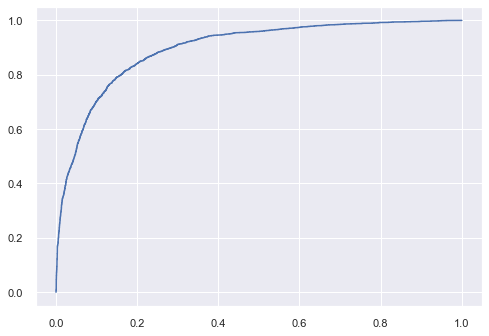

In [145]:
y_pred_prob_smote = smote_reg.predict_proba(X)[::, 1]

fpr, tpr, _  = roc_curve(y, y_pred_prob_smote)
auc_smote = roc_auc_score(y, y_pred_prob_smote)
plt.plot(fpr, tpr);

print(auc_smote)

Logistic Regression without balanced data

In [146]:
logreg = LogisticRegression(solver='liblinear', C=29)
logreg.fit(X_train, y_train)
print('Train r2 score:', logreg.score(X_train, y_train))
print('Test r2 score:', logreg.score(X_test, y_test))
class_names = ['Class-NoClaim', 'Class-Claim']
print(classification_report(y_test, logreg.predict(X_test), target_names=class_names))
print(metrics.confusion_matrix(y_test, logreg.predict(X_test)) )

Train r2 score: 0.824375
Test r2 score: 0.825
               precision    recall  f1-score   support

Class-NoClaim       0.85      0.90      0.88      1388
  Class-Claim       0.75      0.65      0.69       612

     accuracy                           0.82      2000
    macro avg       0.80      0.78      0.79      2000
 weighted avg       0.82      0.82      0.82      2000

[[1254  134]
 [ 216  396]]


0.8866018065835339


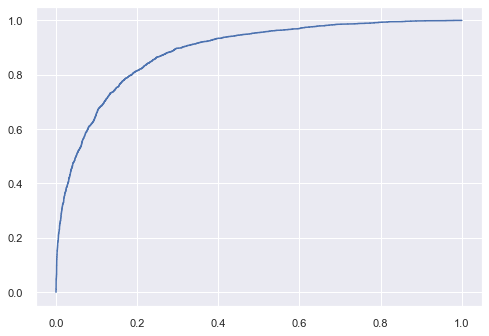

In [147]:
y_pred_prob = logreg.predict_proba(X)[::, 1]

fpr, tpr, _  = roc_curve(y, y_pred_prob)
auc = roc_auc_score(y, y_pred_prob)
plt.plot(fpr, tpr);

print(auc)

Random Forest

In [148]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [149]:
forest = RandomForestClassifier(n_estimators=100, max_depth=4)
forest.fit(x_smote, y_smote)
print('Train r2 score:', forest.score(X_train, y_train))
print('Test r2 score:', forest.score(X_test, y_test))
class_names = ['Class-NoClaim', 'Class-Claim']
print(classification_report(y_test, forest.predict(X_test), target_names=class_names))
print(metrics.confusion_matrix(y_test, forest.predict(X_test)) )

Train r2 score: 0.806625
Test r2 score: 0.8025
               precision    recall  f1-score   support

Class-NoClaim       0.90      0.80      0.85      1388
  Class-Claim       0.64      0.81      0.71       612

     accuracy                           0.80      2000
    macro avg       0.77      0.80      0.78      2000
 weighted avg       0.82      0.80      0.81      2000

[[1112  276]
 [ 119  493]]


0.873636774594564


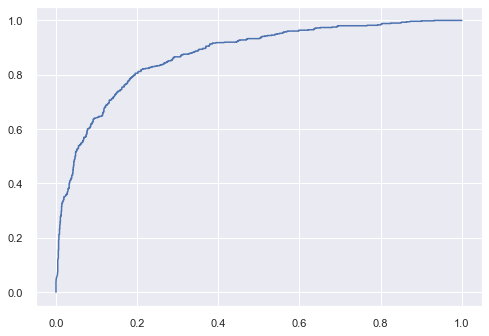

In [150]:
y_pred_prob_forest = forest.predict_proba(X_test)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob_forest)
auc_forest = metrics.roc_auc_score(y_test, y_pred_prob_forest)

plt.plot(fpr, tpr);
print(auc_forest)